170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3403 - loss: 1.7711 - val_accuracy: 0.5455 - val_loss: 1.2794
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.5806 - loss: 1.1832 - val_accuracy: 0.6150 - val_loss: 1.0987
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6495 - loss: 1.0018 - val_accuracy: 0.6392 - val_loss: 1.0224
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6835 - loss: 0.9080 - val_accuracy: 0.6756 - val_loss: 0.9242
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7074 - loss: 0.8307 - val_accuracy: 0.6702 - val_loss: 0.9482
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7302 - loss: 0.7717 - val_accuracy: 0.6914 - val_loss: 0.9042
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7468 - loss: 0.7207 - val_accuracy: 0.6968 - val_loss: 0.8950
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7620 -

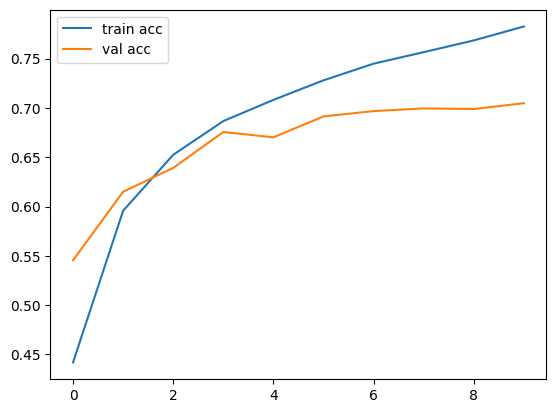

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: dog, True: dog


/tmp/ipython-input-1519601864.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_class = class_names[int(y_test[index])]


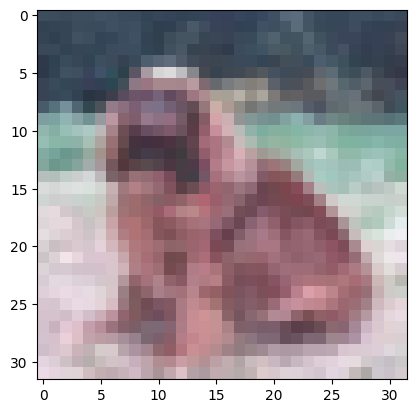

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random test image
index = 101
img = x_test[index]
plt.imshow(img)

pred = model.predict(img.reshape(1,32,32,3))
predicted_class = class_names[np.argmax(pred)]
true_class = class_names[int(y_test[index])]

print(f"Prediction: {predicted_class}, True: {true_class}")


In [ ]:
import cv2, numpy as np

img = cv2.imread("bird.jpg")
img = cv2.resize(img, (32,32))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)  # (1,32,32,3)

pred = model.predict(img)
print("Predicted:", class_names[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted: bird


In [ ]:
import cv2, numpy as np

img = cv2.imread("truck.jpg")
img = cv2.resize(img, (32,32))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)  # (1,32,32,3)

pred = model.predict(img)
print("Predicted:", class_names[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: truck


In [ ]:
import cv2, numpy as np

img = cv2.imread("horse.jpg")
img = cv2.resize(img, (32,32))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)  # (1,32,32,3)

pred = model.predict(img)
print("Predicted:", class_names[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted: horse
